-----------------------------

##  Исследование надёжности заёмщиков

 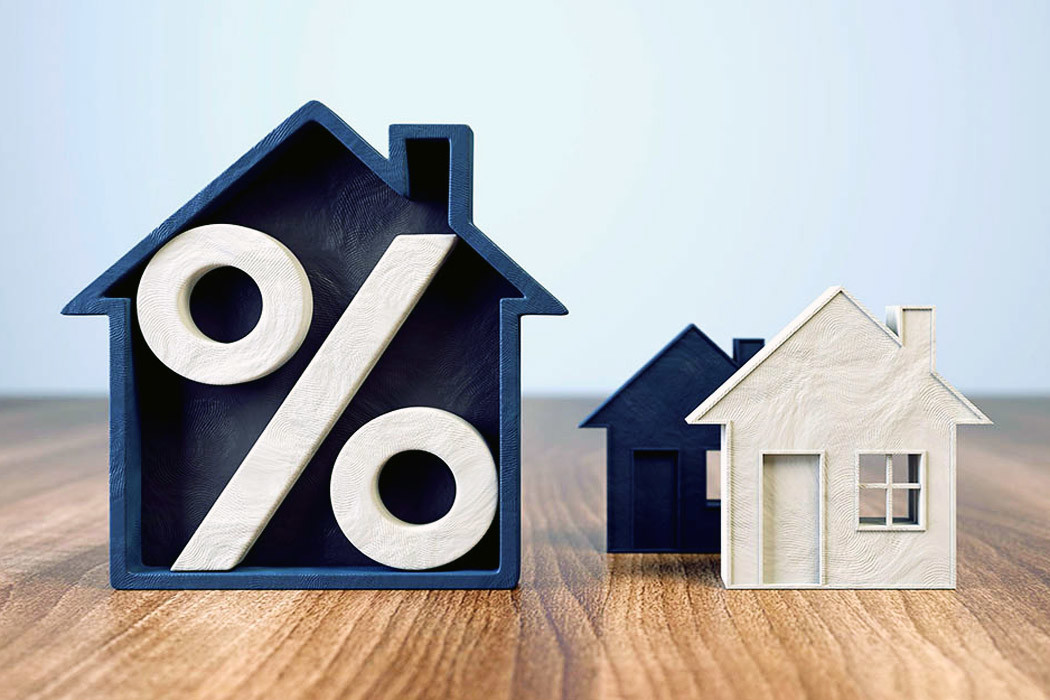

----------------------------------


### Описание проекта
> Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

> Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

--------------------

 <font size="3" ><a id="Содержание"></a>
    
   ***Содержание***    
- [1. Откроем файл с данными и изучим общую информацию](#1)
- [2. Предобработка данных](#2)
- [3. Ответим на вопросы](#3)
- [4. Общий вывод](#4)

### Описание данных:

- children — количество детей в семье
- days_employed — трудовой стаж в днях
- dob_days — возраст клиента в годах
- education — образование клиента
- education_id — идентификатор образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — доход в месяц
- purpose — цель получения кредита

Источник: данные заемщиков `data_customer`

### [Шаг 1. Откроем файл с данными и изучим общую информацию](#Содержание) <a id="1"></a> 

In [2]:
import pandas as pd 

#импортирурем таблицу с данными клиентов банка, они оформили кредит.
data_customer = pd.read_csv('data_customer.csv')

# расщирение дисплея по максимальному размеру выводимых данных
pd.set_option('display.max_colwidth', -1)

#посмторим на данные
data_customer.info()

#есть отрицательные значения, и некорректные в столбце children
data_customer['children'] = data_customer['children'].replace(-1, 1) # вероятно '-' случайность перед значением 1. 
data_customer['children'] = data_customer['children'].replace(20, 2) # лишний ноль 
#print(data_customer['children'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
   children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4  

In [ ]:
data_customer.head(10)

### Вывод

- Данные табицы представлены в количестве: 21525 строк и 12 столбцов. 
- Типы данных разнообразны: целые и дробные числа, а также текст. 
- На первый взгляд много котегорийных переменных: столбцы education, family_status, gender, income_type, purpose.
- В столбцах days_employed и total_income есть пропущенные или некоректные значения по отношению к количеству всех строк в DataFrame, при этом количество строк в данных столбах одинаковое. 
- Есть отрицательные значения в количественных переменных. 

### [Шаг 2. Предобработка данных](#Содержание) <a id="2"></a> 

#### Обработка пропусков

In [3]:
#12300 - прожиточный минимуим для пенсионера
(data_customer.loc[data_customer['income_type'] == 'пенсионер', 'total_income']
         = data_customer.loc[data_customer['income_type'] == 'пенсионер', 'total_income'].fillna(12130))

# заменим пропуски дохода медианной для госслужащих и сотрудников
state_employee_median = data_customer.loc[data_customer['income_type'] == 'госслужащий', 'total_income'].median()
(data_customer.loc[data_customer['income_type'] == 'госслужащий', 'total_income'] 
         = data_customer.loc[data_customer['income_type'] == 'госслужащий', 'total_income'].fillna(state_employee_median))
employee_median = data_customer.loc[data_customer['income_type'] == 'сотрудник', 'total_income'].median()
(data_customer.loc[data_customer['income_type'] == 'сотрудник', 'total_income'] 
         = data_customer.loc[data_customer['income_type'] == 'сотрудник', 'total_income'].fillna(employee_median))

# средний трудовой стаж в России до выхода на пенсию 34,5 года или 12593 дня 
(data_customer.loc[data_customer['income_type'] == 'пенсионер'] 
         = data_customer.loc[data_customer['income_type'] == 'пенсионер'].fillna(12593))

# трудовой стаж госслужащего до выхода на пенсию 17 лет или 6205 дней 
(data_customer.loc[data_customer['income_type'] == 'госслужащий']
         = data_customer.loc[data_customer['income_type'] == 'госслужащий'].fillna(6205))

# средний срок жизни бизнеса в России превысил 1,5 года или 546 дней 
(data_customer.loc[data_customer['income_type'] == 'компаньон'] 
         = data_customer.loc[data_customer['income_type'] == 'компаньон'].fillna(546))

(data_customer.loc[data_customer['income_type'] == 'предприниматель'] 
        = data_customer.loc[data_customer['income_type'] == 'предприниматель'].fillna(546))

# средний стаж работы сотрудников на одном месте 8 лет или 2920 дней
(data_customer.loc[data_customer['income_type'] == 'сотрудник'] 
        = data_customer.loc[data_customer['income_type'] == 'сотрудник'].fillna(2920))

print(data_customer.isna().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


#### Вывод

Используя методы isnull() и sum(), количество пропущенных значений равно: в days_employed = 2174 и в total_income = 2174.
Методом isna() перепроверили данные на предмет случайных ошибок в данных. Тип данных в столбцах days_employed и total_income  целые и дробные числа, целесообразно заменить пропущенные значение с помощью метода fillna() на 0. Строки в столбцах: информация о лицах без стажа(days_employed) и соответственно, не имеющих доход(total_income) пропущенны ввиду отсутствия работы субъектов анализа, а как следствие стажа и дохода.   

#### Замена типа данных

In [15]:
data_customer['days_employed'] = data_customer['days_employed'].astype(int)
data_customer['total_income'] = data_customer['total_income'].astype(int)

#### Вывод

Заменим вещественный тип данных float64(2) на целочисленный int64(5)(столбцы days_employed и total_income)  с помощью метода astype('int'). Изменения присвоили. 


#### Обработка дубликатов

In [5]:
#print(data_customer.duplicated().sum())  - в данных 54 серии дубликата. 
#print(data_customer['dob_years'].unique()) # значение корректные для анализа 
#print(data_customer['education_id'].unique()) # значение корректные для анализа 
#print(data_customer['family_status_id'].unique()) # значение корректные для анализа 
#print(data_customer['debt'].unique()) # значение корректные для анализа             
data_customer = data_customer.drop_duplicates().reset_index(drop=True)
print(data_customer.duplicated().sum())

0


### Вывод

Удалили дубликаты методом drop_duplicates() в связке с reset_index(), сохранили индексацию. Возможно строки задублировались. Использовали метод unique() для определения в каждом столбце уникальные значения. Описали только те, которые не нуждаются в предобработке. 

In [6]:
data_customer

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,-4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21467,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21468,1,-2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21469,3,-3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


#### Лемматизация

In [7]:
#print(data_customer['purpose'].unique())
from pymystem3 import Mystem
m = Mystem()
list_purpose = data_customer['purpose'].unique()

def purpose_group(purpose):
    lemmas = m.lemmatize(purpose)
    if 'свадьба' in lemmas:
        return 'свадьба'
    if 'недвижимость' in lemmas:
        return 'недвижимость'
    if 'жилье' in lemmas:
        return 'недвижимость'
    if 'автомобиль' in lemmas:
        return 'автомобиль'
    if 'образование' in lemmas:
        return 'образование'

data_customer['purpose_short'] = data_customer['purpose'].apply(purpose_group)
list_lemm = data_customer['purpose_short']
#list_lemm.unique())
print(data_customer['purpose_short'].unique())

['недвижимость' 'автомобиль' 'образование' 'свадьба']


#### Вывод

Столбец purpose необходимо категоризировать, с помощью ручного поиска определили 4 категории. С помощью лемматизации, функции, цикла и метода apply() осуществляютс необходимые изменения, и записываются в столбец purpose

#### Категоризация данных

In [8]:
data_customer['education'] = data_customer['education'].str.lower()# приведение к общему регистру
#print(data['education'].unique())
income_type_grouped = data_customer.groupby('income_type').count()
def income_group(category):
    if category =='сотрудник' or category == 'компаньон' or category == 'госслужащий'or category == 'предприниматель':
        return 'трудоустроен'
    else:
        return 'нетрудоустроен'   
data_customer['income_group'] = data_customer['income_type'].apply(income_group)# требуется категоризация возрастных групп, 2 группы в новом столбце income_group
#print(data_customer['income_type'].unique()) 
data_customer.days_employed = data_customer.days_employed.abs() 
#print(data_customer['days_employed'].unique())
# категоризация доходов клиентов на 5 групп: малоимущие<12300, бедные<36000, средний класс<100000, состоятельные < 250000, богатые> 250000
total_income_grouped = data_customer.groupby('total_income').count()
def total_group(total):
    if total < 12300:
        return 'малоимущие'
    elif 36000 > total > 12300:
        return 'бедные'   
    elif 100000 > total > 36000 :
        return 'средний класс' 
    elif 250000 > total > 100000:
        return 'состоятельные'
    else:
        return 'богатые'
data_customer['total_group'] = data_customer['total_income'].apply(total_group)
print(data_customer.head(10))

   children  days_employed  dob_years education  education_id  \
0         1           8437         42    высшее             0   
1         1           4024         36   среднее             1   
2         0           5623         33   среднее             1   
3         3           4124         32   среднее             1   
4         0         340266         53   среднее             1   
5         0            926         27    высшее             0   
6         0           2879         43    высшее             0   
7         0            152         50   среднее             1   
8         2           6929         35    высшее             0   
9         0           2188         41   среднее             1   

      family_status  family_status_id gender income_type  debt  total_income  \
0   женат / замужем                 0      F   сотрудник     0        253875   
1   женат / замужем                 0      F   сотрудник     0        112080   
2   женат / замужем                 0      M

#### Вывод

Использовался метод str.lower() для изменения регистра столбца education. Методом abs() убрали отрицательные значения, так как число дней - положительное. С помощью функции, цикла и метода apply() добавили категорийную переменную в столбец income_group - данные о трудоустройствен в настоящий момент исходя из данных income_type. 

### [Шаг 3. Ответим на вопросы](#Содержание) <a id="3"></a> 

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [9]:
#data_customer.info()
dependence_children = data_customer.groupby('children').agg({'debt':['count', 'sum']}) #группировка в сводную таблицу
print(dependence_children)   
#print('{:.2%}'.format( 14107 / data_customer['debt'].count()))
#print('{:.2%}'.format( (330+41) / data_customer['debt'].count()))

           debt      
          count   sum
children             
0         14107  1063
1          4856   445
2          2128   202
3           330    27
4            41     4
5             9     0


### Вывод

Использовали методы groupby() и agg() для составление сводной таблицы. Выяснилось, что прямая зависимость сущществует: чем больше детей, тем меньше сумма долга и количество должников соответственно. Доля клиентов - многодетных семей (3 и 4 ребенка) составляет менее 2% . Доля клиентов должников, не имеющих детей, по отношению ко всем клиентам составляет 65,7%.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [10]:
dependence_family_status = data_customer.groupby('family_status').agg({'debt':['count', 'sum']}) #группировка в сводную таблицу
print(dependence_family_status)
#print('{:.2%}'.format(12344 / data_customer['debt'].count()),'{:.2%}'.format((4163)/ data_customer['debt'].count()))

                        debt     
                       count  sum
family_status                    
Не женат / не замужем   2810  274
в разводе               1195   85
вдовец / вдова           959   63
гражданский брак        4163  388
женат / замужем        12344  931


### Вывод

Кредит - дело семейнное. Клиентов, которые взяли кредит и которые состоят в офицальном браке 57,49 %, их больше чем всех остальных вместе взятых. Доля клиентов в гражданском браке 19,39%. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [11]:
dependence_total_income = data_customer.groupby('total_group').agg({'debt':['count','sum']}) #группировка в сводную таблицу
print(dependence_total_income)
#print('{:.2%}'.format(75 / data_customer['debt'].count()),'{:.2%}'.format((12076)/ data_customer['debt'].count()))
#print('{:.2%}'.format(4932 / data_customer['debt'].count()),'{:.2%}'.format((4388)/ data_customer['debt'].count()))

                debt      
               count   sum
total_group               
бедные            75     4
богатые         2812   194
малоимущие       898    65
состоятельные  13298  1128
средний класс   4388   350


### Вывод

На класс состоятельных клиентов приходится 56,24% от суммы всех клиентов, при этом совокупность доли бедных и малоимущих клиентов менее 1%. Следуя данным показателям, состоятельные клиенты тратят больше остальных на обслуживание кредита, при этом хуже всех справляютс с обязательствами. 

In [12]:
data_customer.debt.value_counts()

0    19730
1     1741
Name: debt, dtype: int64

In [13]:
30 / 1741 # доля должников с минимальной з/п
35 / 1741 # доля должников-пенсионеров 

0.020103388856978748

- Как разные цели кредита влияют на его возврат в срок?

In [14]:
pd.pivot_table(data_customer, index='purpose_short', values='debt', aggfunc=['sum', 'count', 'mean'])

,sum,count,mean
,debt,debt,debt
purpose_short,,,
автомобиль,403,4308,0.093547
недвижимость,782,10814,0.072314
образование,370,4014,0.092177
свадьба,186,2335,0.079657


### Вывод

Столбец медиан показывает примерное равенство соотношение долга суммы долга к количеству должников с кредитом на данную цель. Выходит, что цель не влияет на возврат кредита. 

### [Шаг 4. Общий вывод](#Содержание) <a id="4"></a> 

Данные противоречивы. Столбцы плохо сответствуют друг другу, данные неоднородные. 
- Исключение: зависимость долга и дохода. В итоге предобработки заменили пропуски медианными значениями и реальными значеними с учетом категории клиентов. Избавились от дубликатов и изменили тип данных для дальнейшей обработки. Провели лемматизацию целей получения кредита и категоризацию столбцов, для добавления новых  категориальных переменных, добавили новые столбцы в data_customer. 

Использовали метод группировки и сводных таблицы для анализа данных.

**Выяснилось, что:** 

1) Есть зависимость между наличием детей и возвратом кредита в срок - доля должников без детей составляет 65,7%. 
      - Выявлена закономерность: чем больше детей, тем клиенты лучше справляются с обязательствами
      
2) Есть зависимость между семейным положением и возвратом кредита в срок - доля должников в офицальном браке 57,49% и доля должников в гражданском браке 19,39%.
      - Выявлена закономерность: клиентов, проживающих совместно с супрогом(ой) внушительное большинство, около 78%, возможно это связанно с возрастающими потребностями при образование семьи, и как следствие - рост финансовой нагрузки
      
3) Есть зависимость между уровнем дохода и возвратом кредита в срок - состоятельных граждан - должников 56,24%, в то же время малоимущих менее 1%. 
      - Выявлена закономерность: только 4 класса из 5 попали должны банку, при этом малоимущих минимум, а доля состоятельных клиентов- должников более половины, средний класс 22,97% и богатые 20,44% примерно одинаково. Отсюда следует вывод: состоятельные класс клиентов рискованный, на их долю долгов приходится больше остальных вместе взятых
      
4) Нет зависимости между целей кредита и его возвратом. Цель не влияет на возврат кредита, доля должников примерно одинаковая 